<a href="https://colab.research.google.com/github/KondamPravalikaReddy/AirAware-Smart-Air-Quality-Prediction/blob/main/Infosys_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Install & Setup Kaggle API
!pip install kaggle -q

In [7]:
# Upload kaggle.json (from your Kaggle account → API → Create New Token)
from google.colab import files
files.upload()   # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pravalikareddi","key":"cc23ca85e0877e600aaa326978d10bad"}'}

In [8]:
# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
# Download Dataset
!kaggle datasets download -d taweilo/taiwan-air-quality-data-20162024 -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024
License(s): CC0-1.0
  0% 0.00/172M [00:00<?, ?B/s]
100% 172M/172M [00:00<00:00, 2.13GB/s]


In [10]:
# 3. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 4. Load Dataset
import pandas as pd
df = pd.read_csv("air_quality.csv", low_memory=False) # file name after unzip
print("Original Data:\n")
print(df.head())

Original Data:

               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3 o3_8hr  ... windspeed winddirec unit co_8hr pm2.5_avg pm10_avg  \
0  0.17  35.0   40.2  ...       2.3       225  NaN    0.2      20.1     26.0   
1  0.32  27.9   35.1  ...       1.1       184  NaN    0.2      15.3     23.0   
2  0.17  25.1   40.6  ...       0.4       210  NaN    0.2      13.8     24.0   
3   0.2  30.0   35.9  ...       1.9       239  NaN    0.2      13.0     26.0   
4  0.16  33.5   35.9  ...       1.8       259  NaN    0.1      15.3     28.0   

  so2_avg   long

In [ ]:
# Data Cleaning

# Check null values
print("\nMissing Values:\n", df.isnull().sum())

# Convert 'pm2.5', 'pm10', and 'o3' to numeric, coercing errors to NaN
df['pm2.5'] = pd.to_numeric(df['pm2.5'], errors='coerce')
df['pm10'] = pd.to_numeric(df['pm10'], errors='coerce')
df['o3'] = pd.to_numeric(df['o3'], errors='coerce')


# Example: fill numeric columns with mean
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].mean())


# Example: fill categorical/text columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert Date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check null values after cleaning
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values:
 date              85
sitename           0
county             0
aqi                0
pollutant          0
status             0
so2                0
co                 0
o3                 0
o3_8hr             0
pm10               0
pm2.5              0
no2                0
nox                0
no                 0
windspeed          0
winddirec          0
unit         5881862
co_8hr             0
pm2.5_avg          0
pm10_avg           0
so2_avg            0
longitude          0
latitude           0
siteid             0
Year              85
Month             85
dtype: int64

Missing Values After Cleaning:
 date              85
sitename           0
county             0
aqi                0
pollutant          0
status             0
so2                0
co                 0
o3                 0
o3_8hr             0
pm10               0
pm2.5              0
no2                0
nox                0
no                 0
windspeed          0
winddirec          0
unit        

In [ ]:
#  Basic Overview
print("\nShape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe())


Shape: (5882189, 25)

Data Types:
 date         datetime64[ns]
sitename             object
county               object
aqi                 float64
pollutant            object
status               object
so2                  object
co                   object
o3                   object
o3_8hr               object
pm10                 object
pm2.5                object
no2                  object
nox                  object
no                   object
windspeed            object
winddirec            object
unit                float64
co_8hr               object
pm2.5_avg            object
pm10_avg             object
so2_avg              object
longitude           float64
latitude            float64
siteid              float64
dtype: object

Summary Stats:
                                 date           aqi  unit     longitude  \
count                        5882104  5.882189e+06   0.0  5.882189e+06   
mean   2020-11-22 10:44:45.515795200  5.419279e+01   NaN  1.208235e+02   
min        

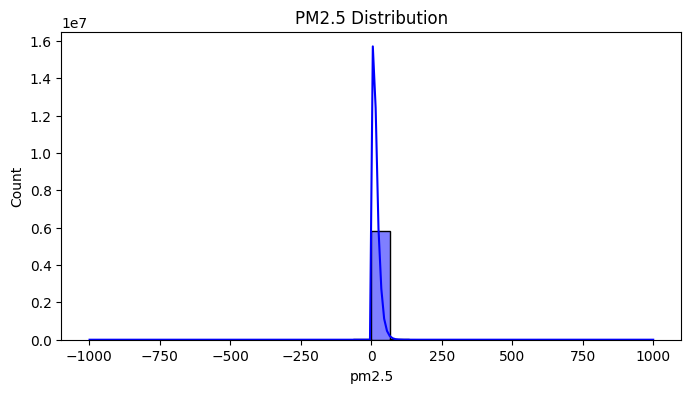

In [ ]:
#  Univariate Analysis
plt.figure(figsize=(8,4))
sns.histplot(df["pm2.5"], kde=True, color="blue", bins=30)
plt.title("PM2.5 Distribution")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(x=df["pm2.5"], color="orange")
plt.title("PM2.5 Boxplot")
plt.show()

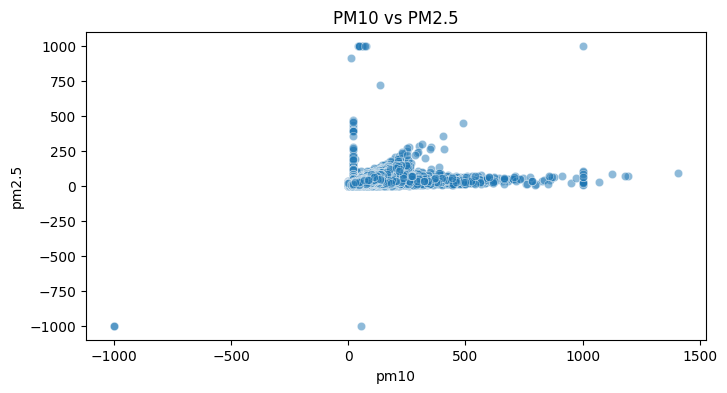

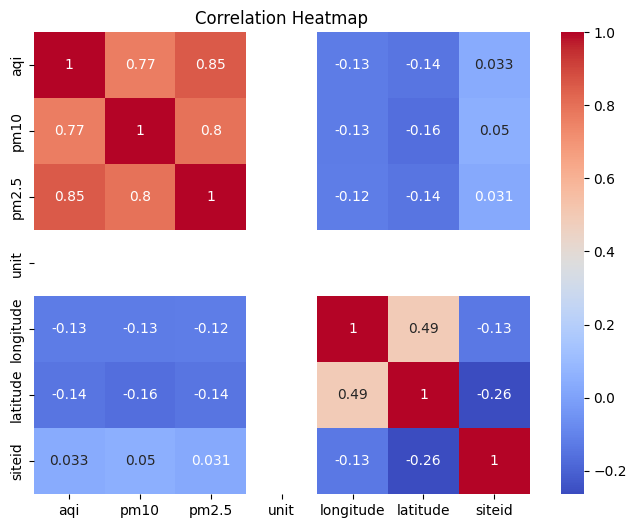

In [ ]:
#  Bivariate Analysis
plt.figure(figsize=(8,4))
sns.scatterplot(x="pm10", y="pm2.5", data=df, alpha=0.5)
plt.title("PM10 vs PM2.5")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

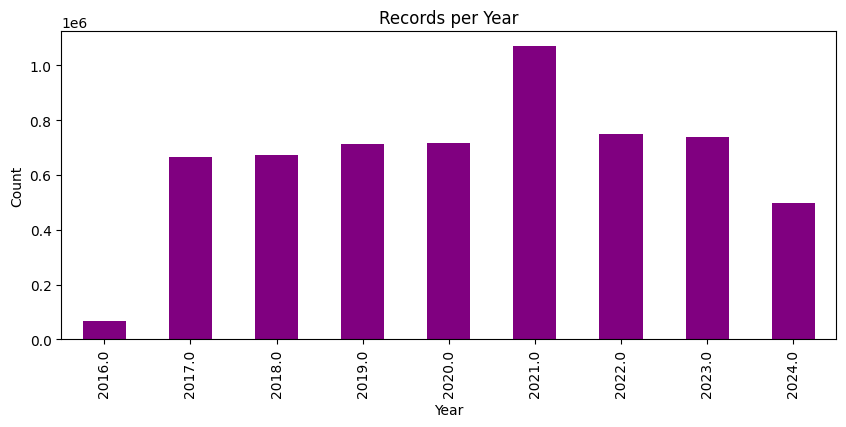

In [ ]:
#  Date-Time Analysis
df["Year"] = df["date"].dt.year
df["Month"] = df["date"].dt.month

plt.figure(figsize=(10,4))
df["Year"].value_counts().sort_index().plot(kind="bar", color="purple")
plt.title("Records per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

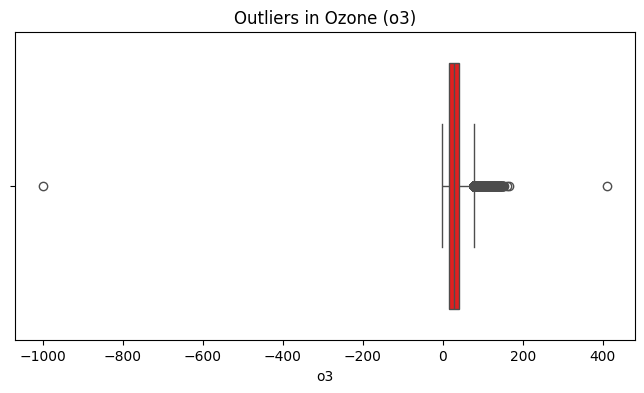

In [ ]:
#  Outlier Detection
plt.figure(figsize=(8,4))
sns.boxplot(x=df["o3"], color="red")
plt.title("Outliers in Ozone (o3)")
plt.show()

In [ ]:
#  Save Cleaned Dataset
df.to_csv("taiwan_air_quality_cleaned.csv", index=False)
print("\n Cleaned & EDA-ready dataset saved as 'taiwan_air_quality_cleaned.csv'")


 Cleaned & EDA-ready dataset saved as 'taiwan_air_quality_cleaned.csv'
